In [1]:
# Lo primero que hago para poder trabajar con los datos es importar las librerias necesarias:

# Para tratamiento de datos:
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt



# configuro pandas para que me muestre todas las columnas del dataframe

pd.set_option('display.max_columns', None)

In [2]:
# ABRO LOS CSV PARA PODER TRABAJAR CON ELLOS

customer_info = pd.read_csv('files/Customer Info Limpio.csv')
customer_final = pd.read_csv('files/Customer Final Limpio.csv')

# hacemos un head de ambos para ver que se han cargado bien

display(customer_info.head(2))
display(customer_final.head(2))

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73479.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016.0,2.0,NaN,NaN,2017.0,1.0,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016.0,2.0,NaN,NaN,2017.0,2.0,3,0,3,2823,282.0,0,0


## 2: VISUALIZACION

### 2.1: ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [3]:
# En este ejercicio se nos pide el total de vuelos reservados por mes y año. 
print(f"""
Primero voy a filtrar por año, para poder hacer un dataframe por cada año, agrupando
los vuelos por meses. Si no filtramos por año van a sumarse los vuelos de los meses coincidentes
de años distintos. Los años de los que tenemos datos son
{customer_final['Year'].unique()}""")

# para 2017
customer_final_2017 = customer_final[customer_final['Year'] == 2017].groupby('Month')['Flights Booked'].sum()

print("En 2017 el total de vuelos realizados por cada mes son ==>")
customer_final_2017 = customer_final_2017.reset_index()
customer_final_2017


Primero voy a filtrar por año, para poder hacer un dataframe por cada año, agrupando
los vuelos por meses. Si no filtramos por año van a sumarse los vuelos de los meses coincidentes
de años distintos. Los años de los que tenemos datos son
[2017. 2018.]
En 2017 el total de vuelos realizados por cada mes son ==>


,Month,Flights Booked
0,1.0,47766
1,2.0,47691
2,3.0,64271
3,4.0,55720
4,5.0,65279
5,6.0,80493
6,7.0,89288
7,8.0,78692
8,9.0,63304
9,10.0,60351


In [4]:
# Hacemos lo mismo para 2018

customer_final_2018 = customer_final[customer_final['Year'] == 2018].groupby('Month')['Flights Booked'].sum()
print("En 2018 el total de vuelos realizados por cada mes son ==>")
customer_final_2018 = customer_final_2018.reset_index()
customer_final_2018

En 2018 el total de vuelos realizados por cada mes son ==>


,Month,Flights Booked
0,1.0,49170
1,2.0,48643
2,3.0,66928
3,4.0,56791
4,5.0,76891
5,6.0,92749
6,7.0,104143
7,8.0,90512
8,9.0,73075
9,10.0,69110


C:\Users\Laura Romero\AppData\Local\Temp\ipykernel_10016\522609288.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);
C:\Users\Laura Romero\AppData\Local\Temp\ipykernel_10016\522609288.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);


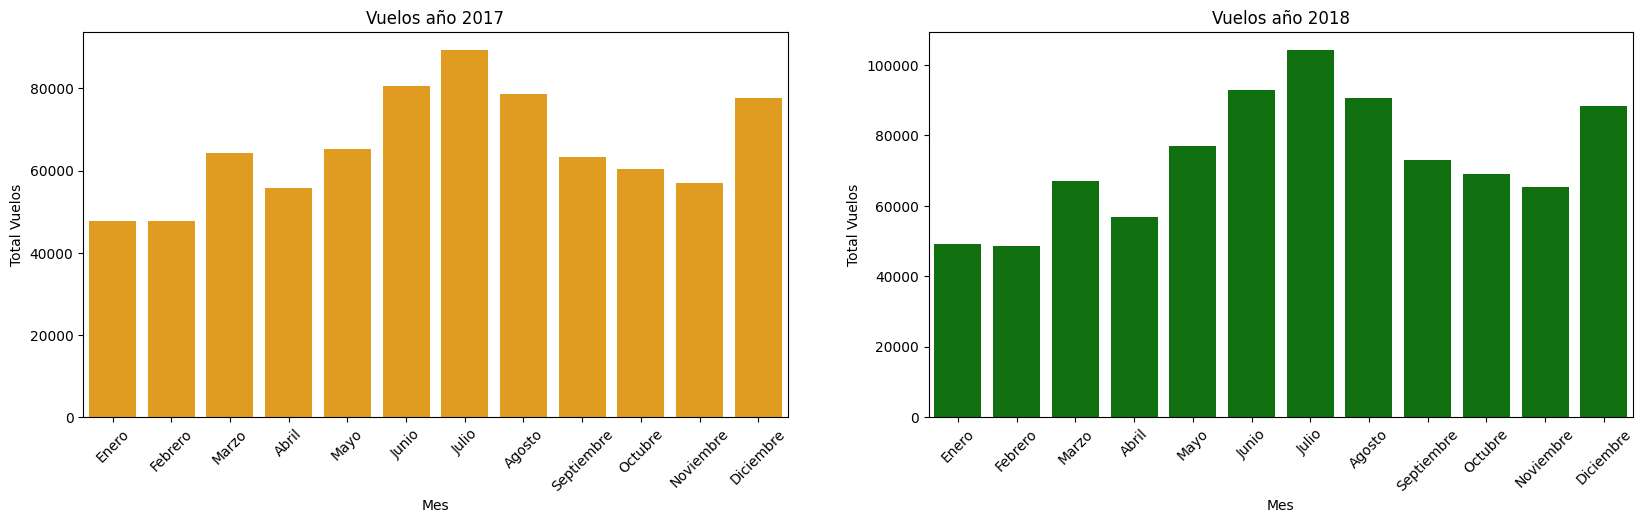

In [42]:
# Para ver la distribución del número de vuelos por mes y año podemos usar un diagrama de barras.
# Para poder comparar el año 2017 y el 2018 uso el metodo subplots, que me permite poner varias figuras
# juntas, lo cual resulta muy útil para poder comparar. 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5));

# en la posicion 0,0 pondremos el diagrama de barras del año 2017
sns.barplot(data=customer_final_2017, x='Month', y="Flights Booked", ax=axes[0], color="orange");
axes[0].set_title('Vuelos año 2017');
axes[0].set_xlabel('Mes');
axes[0].set_ylabel('Total Vuelos');
axes[0].tick_params(axis='x', rotation=45);

# en la posicion 0,1 pondremos el diagrama de barras del año 2017
sns.barplot(data=customer_final_2018, x='Month', y="Flights Booked", ax=axes[1], color="green");
axes[1].set_title('Vuelos año 2018');
axes[1].set_xlabel('Mes');
axes[1].set_ylabel('Total Vuelos');
axes[1].tick_params(axis='x', rotation=45);

# Para que salga el nombre del mes en lugar de un numero del 1-12 cambio las etiquetas del eje x con set_xticklabels
axes[0].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);
axes[1].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']);


In [6]:
print("""
La distribución del numero de vuelos agrupados por mes, para el año 2017 y el año 2018 
es muy similar, aunque se han reservado más vuelos en el año 2018 (en Julio de 2018 se reservaron 
más de 100000 vuelos).
--------------------------------------------------------------------------------------------------
En ambos años, los meses en los que más vuelos se han reservado son Junio, Julio y Agosto, lo cual 
tiene sentido porque coincide con el periodo vacacional de muchas personas.
--------------------------------------------------------------------------------------------------
Otro mes muy bueno tanto en 2017 como en 2018 fue Diciembre: lógico teniendo en cuenta que mucha 
gente viaja en Navidades.
--------------------------------------------------------------------------------------------------
Los meses en los que menos vuelos se han reservado, tanto en 2017 como en 2018 son Enero y Febrero
""")


La distribución del numero de vuelos agrupados por mes, para el año 2017 y el año 2018 
es muy similar, aunque se han reservado más vuelos en el año 2018 (en Julio de 2018 se reservaron 
más de 100000 vuelos).
--------------------------------------------------------------------------------------------------
En ambos años, los meses en los que más vuelos se han reservado son Junio, Julio y Agosto, lo cual 
tiene sentido porque coincide con el periodo vacacional de muchas personas.
--------------------------------------------------------------------------------------------------
Otro mes muy bueno tanto en 2017 como en 2018 fue Diciembre: lógico teniendo en cuenta que mucha 
gente viaja en Navidades.
--------------------------------------------------------------------------------------------------
Los meses en los que menos vuelos se han reservado, tanto en 2017 como en 2018 son Enero y Febrero



### 2.2: ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Text(0, 0.5, 'Puntos Acumulados')

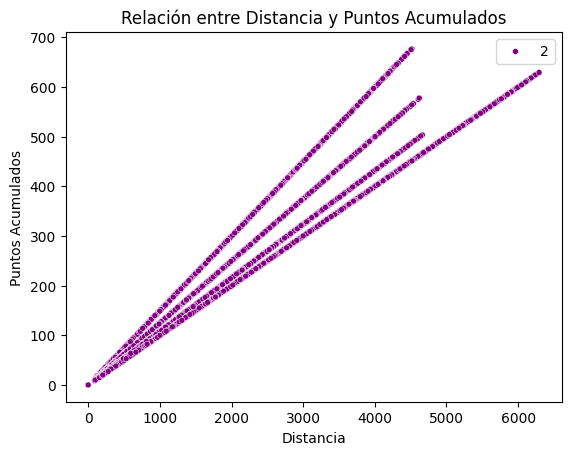

In [7]:
# Para ver correlacion entre dos variables podemos hacer un scatter plot

sns.scatterplot( x='Distance', y='Points Accumulated', data=customer_final, size=2, color="purple")
plt.title("Relación entre Distancia y Puntos Acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos Acumulados")



In [45]:
print(f"""
La relacion entre la distancia recorrida y los puntos acumulados por el cliente es 
una correlación positiva, cuanto más viaja el cliente más puntos acumulados tiene.""")


La relacion entre la distancia recorrida y los puntos acumulados por el cliente es 
una correlación positiva, cuanto más viaja el cliente más puntos acumulados tiene.


### 2.3: ¿Cuál es la distribución de los clientes por provincia o estado?

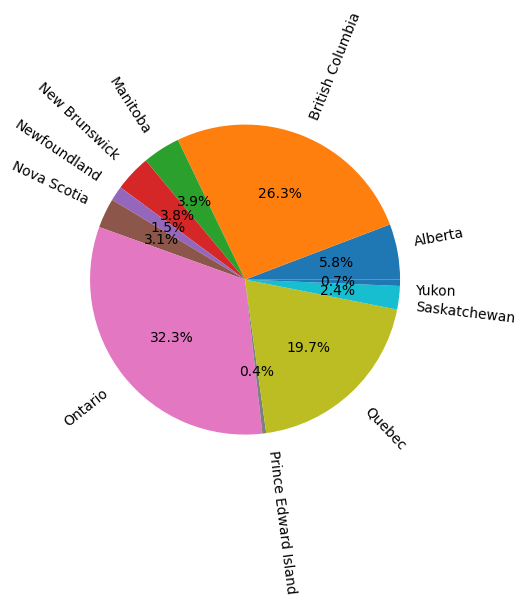

In [11]:
# Una forma de ver proporciones, es usando diagrama de pastel. Para ello necesito agrupar por provincia 
# a todos los clientes y hacer el recuento el numero de clientes que hay en cada una de ellas. 
# En este caso, el dataframe que voy a usar es customer_info, pues es donde tengo los dos datos que se nos 
# pide y un identificador único para el cliente que es Loyalty Number. 


plt.figure(figsize=(5,10))
customer_province = customer_info.groupby('Province')['Loyalty Number'].count().reset_index()
plt.pie("Loyalty Number", labels= "Province", data=customer_province, autopct="%1.1f%%", rotatelabels=45, );

In [46]:
print(f"""
Aproximadamente un tercio de los clientes residen en Ontario (un 32.3%), una cuarta parte aproximadamente
residen en British Columbia (26.4%) y aproximadamente una quinta parte residen en Quebec (19.7%) siendo 
las 3 provincias mayoritarias.""")




Aproximadamente un tercio de los clientes residen en Ontario (un 32.3%), una cuarta parte aproximadamente
residen en British Columbia (26.4%) y aproximadamente una quinta parte residen en Quebec (19.7%) siendo 
las 3 provincias mayoritarias.


### 2.4: ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [29]:
# Lo primero es hacer el dataframe que contenta los datos que queremos evaluar. En este caso se pide el salario promedio
# según el nivel educativo de los clientes. 
# Igual que en el caso anterior, como todos los datos los tengo en customer_info y ahi tengo identificador unico para cada
# cliente lo hago con customer_info

customer_education = customer_info.groupby('Education')['Salary'].mean().reset_index()
customer_education = customer_education.rename(columns={'Salary': 'Mean Salary'})
display(customer_education)


,Education,Mean Salary
0,Bachelor,72451.061575
1,College,73479.000000
2,Doctor,178608.897820
3,High School or Below,61071.718670
4,Master,103757.848425


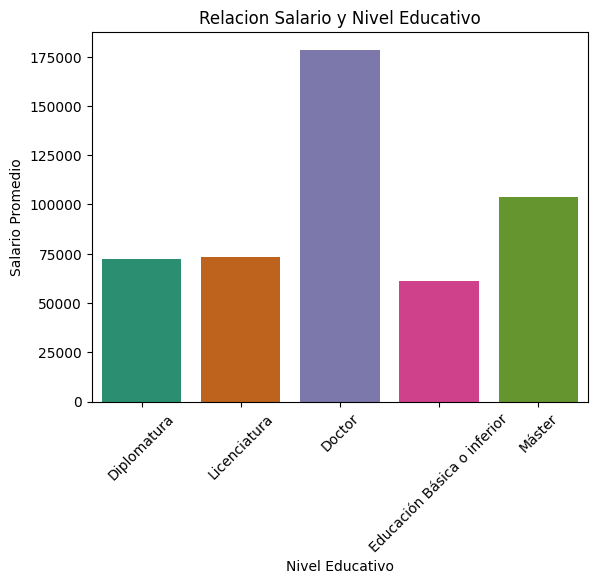

In [47]:
sns.barplot(data=customer_education, x='Education', y="Mean Salary", hue='Education', palette='Dark2')
plt.title("Relacion Salario y Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio")
plt.tick_params(axis='x', rotation=45);

etiquetas_x = ['Diplomatura', 'Licenciatura', 'Doctor', 'Educación Básica o inferior', 'Máster']
plt.xticks(ticks=range(5), labels=etiquetas_x);

# la traduccion de los ejes x no es literal, pues los sistemas educativos entre Canadá y España son distintos, pero para 
# que se entienda mejor lo pongo en castellano. 


In [15]:
print("""
Los salarios más altos se concentran mayoritariamente en los clientes que son Doctores, que tienen un promedio de salario
que casi duplica a la segunda categoría con salarios más altos, que son clientes que han estudiado algún Master.
Los que tienen menor Salario son aquellos que no tienen educación superior. 
""")


Los salarios más altos se concentran mayoritariamente en los clientes que son Doctores, que tienen un promedio de salario
que casi duplica a la segunda categoría con salarios más altos, que son clientes que han estudiado algún Master.
Los que tienen menor Salario son aquellos que no tienen educación superior. 



### 2.5: ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [16]:
# Para contar el numero de clientes que tienen los diferentes tipos de tarjeta uso el dataframe customer_info, que tiene 
# esta información completa y cada Loyalty Number es un identificador único. 
# Hago un Dataframe solo con la informacion que necesito, en este caso, cada tipo de tarjeta y el recuento total de clientes para cada una
customer_loyalty_card = customer_info.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
customer_loyalty_card

,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


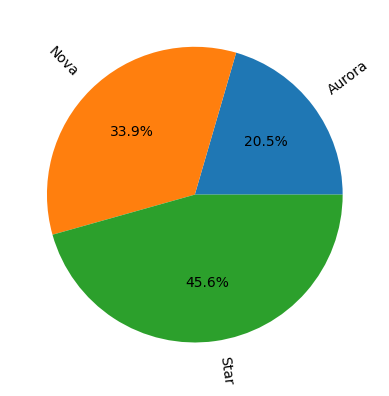

In [17]:
# Elijo un gráfico de tipo pie, pues se ve muy claramente la mayor o menor proporcion de cada grupo.

plt.pie("Loyalty Number", labels= "Loyalty Card", data=customer_loyalty_card, autopct="%1.1f%%", rotatelabels=45);

In [18]:
print(f"""
Casi la mitad de los clientes tienen una tarjeta Star (45.6%), en torno a un tercio tienen tarjeta de tipo
Nova (33.9%) y una quinta parte aproximadamente (20.5 %) tienen tarjeta Aurora
Esto probablemente tenga relación con el Valor Estimado Cliente
------------------------------------------------------------------------------------------------------------------------
Valor medio estimado cliente tarjeta Star ==> {customer_info[customer_info['Loyalty Card'] == 'Star']['CLV'].mean()}
Valor medio estimado cliente tarjeta Nova ==> {customer_info[customer_info['Loyalty Card'] == 'Nova']['CLV'].mean()}
Valor medio estimado cliente tarjeta Aurora ==> {customer_info[customer_info['Loyalty Card'] == 'Aurora']['CLV'].mean()}
-------------------------------------------------------------------------------------------------------------------------
Por tanto vemos que la tarjeta Star es para clientes con menor valor estimado, la tarjeta Nova para clientes 
de más valor, y los mejores clientes, los que más valor aportan a la empresa tienen tarjeta Aurora. 
""")


Casi la mitad de los clientes tienen una tarjeta Star (45.6%), en torno a un tercio tienen tarjeta de tipo
Nova (33.9%) y una quinta parte aproximadamente (20.5 %) tienen tarjeta Aurora
Esto probablemente tenga relación con el Valor Estimado Cliente
------------------------------------------------------------------------------------------------------------------------
Valor medio estimado cliente tarjeta Star ==> 6741.7613722665965
Valor medio estimado cliente tarjeta Nova ==> 8045.615995415271
Valor medio estimado cliente tarjeta Aurora ==> 10672.686325459319
-------------------------------------------------------------------------------------------------------------------------
Por tanto vemos que la tarjeta Star es para clientes con menor valor estimado, la tarjeta Nova para clientes 
de más valor, y los mejores clientes, los que más valor aportan a la empresa tienen tarjeta Aurora. 



### 2.6: ¿Cómo se distribuyen los clientes según su estado civil y género?

In [44]:
# Primero, hacemos el dataframe que vamos a usar para la visualizacion. 
# En este caso agrupamos los datos según el estado civil y hacemos recuento del numero de 
# hombres y mujeres según su estado civil. 

customer_marital = customer_info.groupby('Marital Status')['Gender'].value_counts().reset_index()
customer_marital = customer_marital.rename(columns={'count': 'Count'})
customer_marital

,Marital Status,Gender,Count
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


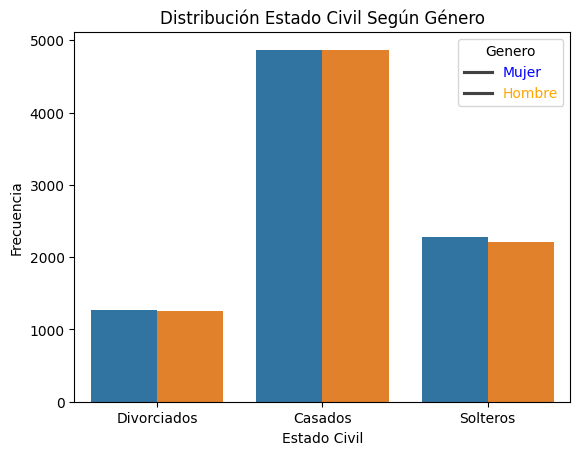

In [56]:
customer_marital = customer_info.groupby('Marital Status')['Gender'].value_counts().reset_index()

sns.barplot(data=customer_marital, x= 'Marital Status', y='count', hue='Gender')
plt.xticks(ticks=range(3), labels=('Divorciados', 'Casados', 'Solteros'));
plt.title('Distribución Estado Civil Según Género')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.legend(title= 'Genero', labels=('Mujer', 'Hombre'), labelcolor=('blue', 'orange'))

